In [ ]:
import torch
from torch import nn
from torch import optim

X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)

# hidden layers 3개
class XOR(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid(),
            nn.Linear(2, 2),
            nn.Sigmoid(),
            nn.Linear(2, 2),
            nn.Sigmoid(),
            nn.Linear(2, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


model = XOR()

def train(x, y, epochs=100, lr=1, loss='BCELoss', optimizer='SGD', model=None, every_print=100, reset=True):
    if not model:
        return

    if reset:
        for layer in model.model:
            if hasattr(layer, 'reset_parameters'):
                if reset == 'xavier':
                    nn.init.uniform_(layer.weight)
                    nn.init.uniform_(layer.bias)
                else:
                    layer.reset_parameters()

    optimizer = getattr(optim, optimizer)(model.parameters(), lr=lr)
    loss_fn = getattr(nn, loss)()

    for epoch in range(1, epochs+1):
        # grad 초기화
        optimizer.zero_grad()

        # forward
        hypothesis = model(x)

        # check loss
        error = loss_fn(hypothesis, y)

        # backward - backpropagation
        error.backward()

        # update parameters
        optimizer.step()

        if epoch % every_print == 0:
            print(f'Epoch: {epoch}, loss: {error.item()}')


print("최적 시나리오:")
train(X, y, epochs=10000, lr=0.01, optimizer='Adam', model=model, every_print=1000)
predictions = model(X)
predicted_classes = torch.where(predictions > 0.5, 1, 0)
print("Predictions:", predictions)
print("Predicted Classes:", predicted_classes)

for name, param in model.named_parameters():
    print(name, param.data)

최적 시나리오:
Epoch: 1000, loss: 0.00987507775425911
Epoch: 2000, loss: 0.002397105097770691
Epoch: 3000, loss: 0.0010224109282717109
Epoch: 4000, loss: 0.0005195625126361847
Epoch: 5000, loss: 0.0002860369277186692
Epoch: 6000, loss: 0.00016417403821833432
Epoch: 7000, loss: 9.645272803027183e-05
Epoch: 8000, loss: 5.7423399994149804e-05
Epoch: 9000, loss: 3.44630861945916e-05
Epoch: 10000, loss: 2.077104181807954e-05
Predictions: tensor([[2.1226e-05],
        [9.9998e-01],
        [9.9998e-01],
        [2.1185e-05]], grad_fn=<SigmoidBackward0>)
Predicted Classes: tensor([[0],
        [1],
        [1],
        [0]])
model.0.weight tensor([[-6.1799,  6.3918],
        [-7.2902,  7.3291]])
model.0.bias tensor([ 3.1900, -4.3039])
model.2.weight tensor([[-5.7749,  6.0148],
        [ 5.7013, -6.6082]])
model.2.bias tensor([ 2.8003, -2.6538])
model.4.weight tensor([[ 6.3596, -6.5419],
        [-6.6853,  7.0563]])
model.4.bias tensor([ 0.1071, -0.1949])
model.6.weight tensor([[ 11.2224, -10.4749]]

**최종 출력값 및 그래프**

In [ ]:
import torch

# 주어진 파라미터
w0 = torch.tensor([[-6.1799,  6.3918], [-7.2902,  7.3291]])
b0 = torch.tensor([ 3.1900, -4.3039])
w2 = torch.tensor([[-5.7749,  6.0148], [ 5.7013, -6.6082]])
b2 = torch.tensor([ 2.8003, -2.6538])
w4 = torch.tensor([[ 6.3596, -6.5419],[-6.6853,  7.0563]])
b4 = torch.tensor([ 0.1071, -0.1949])
w6 = torch.tensor([[ 11.2224, -10.4749]])
b6 =  torch.tensor([-0.3518])

# 입력 데이터
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)

sigmoid = nn.Sigmoid()

# 첫 번째 은닉층의 출력 계산
layer1_output = sigmoid(X @ w0.T + b0)

# 두 번째 은닉층의 출력 계산
layer2_output = sigmoid(layer1_output @ w2.T + b2)

# 세 번째 은닉층의 출력 계산
layer3_output = sigmoid(layer2_output @ w4.T + b4)

# 최종 출력 계산
final_output = sigmoid(layer3_output @ w6.T + b6)
print(final_output)


tensor([[2.1226e-05],
        [9.9998e-01],
        [9.9998e-01],
        [2.1185e-05]])


In [ ]:
import torch
from sympy import symbols, exp
from sympy.plotting import plot3d

# 변수 정의
x, x1, x2 = symbols('x x1 x2')
w1, w2, w3, w4, w5, w6 = symbols('w1 w2 w3 w4 w5 w6')
b1, b2, b3 = symbols('b1 b2 b3')
sigmoid = 1 / (1+exp(-x))

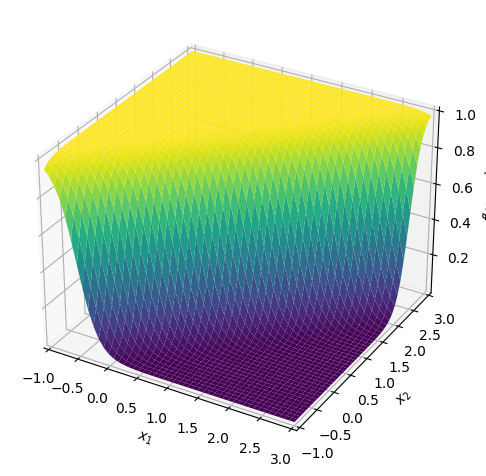

In [ ]:
# 첫 번째 은닉층의 출력 계산식 정의
h1= sigmoid.subs({'x': w1*x1 + w2*x2 + b1})

#3d출력
plot3d(h1.subs({'w1': -6.1799, 'w2': 6.3918, 'b1': 3.1900}) , (x1, -1, 3), (x2, -1, 3))

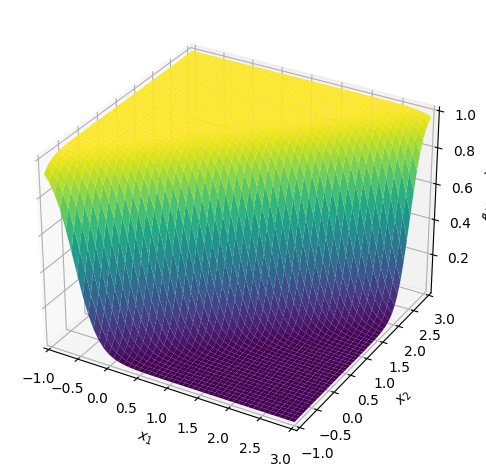

In [ ]:
# 두 번째 은닉층의 출력 계산식 정의
h2= sigmoid.subs({'x': w3*x1 + w4*x2 + b2})

#3d출력
plot3d(h2.subs({'w3': -5.7749, 'w4': 6.0148, 'b2': 2.8003}) , (x1, -1, 3), (x2, -1, 3))

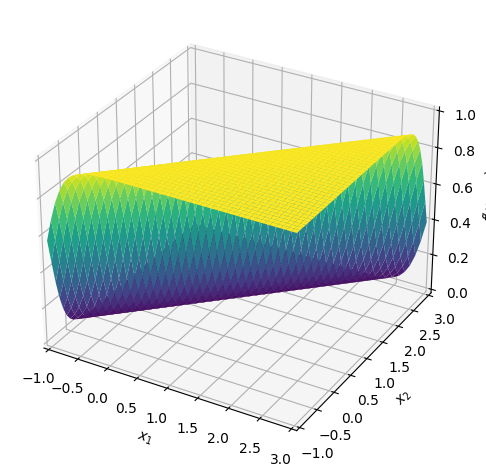

In [ ]:
#세 번째 은닉층의 출력 계산식 정의
h3 = sigmoid.subs({'x': w5*x1 + w6*x2 + b3})

#3d
plot3d(h3.subs({'w5': 6.3596, 'w6': -6.5419, 'b3': 0.1071}) , (x1, -1, 3), (x2, -1, 3))

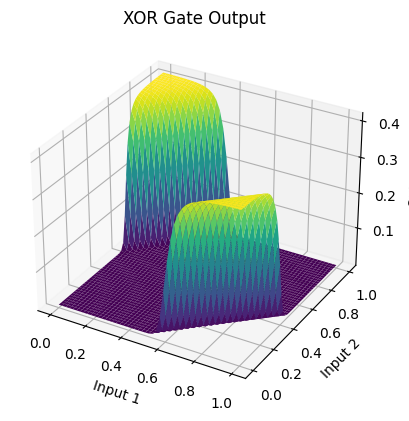

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_xor = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)

class XOR(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(2, 2)
        self.sigmoid = torch.nn.Sigmoid()
        self.layer2 = torch.nn.Linear(2, 2)
        self.sigmoid2 = torch.nn.Sigmoid()
        self.layer3 = torch.nn.Linear(2, 2)
        self.sigmoid3 = torch.nn.Sigmoid()
        self.layer4 = torch.nn.Linear(2, 1)
        self.sigmoid4 = torch.nn.Sigmoid()


    def forward(self, x):
        out = self.layer1(x)
        out = self.sigmoid(out)
        out = self.layer2(out)
        out = self.sigmoid2(out)
        out = self.layer3(out)
        out = self.sigmoid3(out)
        out = self.layer4(out)
        out = self.sigmoid4(out)
        return out

xor_model = XOR()

# 학습된 파라미터 값 대입
xor_model.layer1.weight.data = torch.tensor([[-6.1799, 6.3918],
                                             [-7.2902, 7.3291]])
xor_model.layer1.bias.data = torch.tensor([3.1900, -4.3039])
xor_model.layer2.weight.data = torch.tensor([[-5.7749, 6.0148],
                                             [5.7013, -6.6082]])
xor_model.layer2.bias.data = torch.tensor([2.8003, -2.6538])
xor_model.layer3.weight.data = torch.tensor([[-6.3596,   -6.5419],
                                             [-6.6853, 7.0563]])
xor_model.layer3.bias.data = torch.tensor([0.1071, -0.1949])
xor_model.layer4.weight.data = torch.tensor([[11.2224,   -10.4749]])
xor_model.layer4.bias.data = torch.tensor([-0.3518])

# 3차원 그래프 생성을 위한 입력 데이터 정의
x_values_xor = np.linspace(0, 1, 50)
y_values_xor = np.linspace(0, 1, 50)
xx_xor, yy_xor = np.meshgrid(x_values_xor, y_values_xor)
xy_xor = np.column_stack([xx_xor.ravel(), yy_xor.ravel()])
xy_tensor_xor = torch.tensor(xy_xor, dtype=torch.float)

# 각 점에서의 예측값 계산
with torch.no_grad():
    predictions_xor = xor_model(xy_tensor_xor).numpy().reshape(xx_xor.shape)

# 면 그래프로 출력 시각화
fig = plt.figure()
ax_xor = fig.add_subplot(111, projection='3d')
ax_xor.plot_surface(xx_xor, yy_xor, predictions_xor, cmap='viridis')

ax_xor.set_xlabel('Input 1')
ax_xor.set_ylabel('Input 2')
ax_xor.set_zlabel('Output')
ax_xor.set_title('XOR Gate Output')
plt.show()